# Notebook Base de Regressão Logística

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

## Classe de regressão logística
*Faz o trabalho pesado em regressão logística.*

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)
    
    def plot(self, X, y, legend):
        # only plots if X refers to exactly 2 variables
        if X.shape[1] != 2:
            raise ValueError("Can plot only for X's that refers to exactly 2 vars.")
        
        slope = -(self.weights[0]/self.weights[1])
        intercept = -(self.bias/self.weights[1])
        predictions = self.predict(X)

        sns.set_style('white')
        sns.scatterplot(x = X[:,0], y= X[:,1], hue=y.reshape(-1), style=predictions.reshape(-1));

        ax = plt.gca()
        ax.autoscale(False)
        x_vals = np.array(ax.get_xlim())
        y_vals = intercept + (slope * x_vals)
        plt.plot(x_vals, y_vals, c="k");
        
        plt.xlabel(legend[0])
        plt.ylabel(legend[1])

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Importando a base
*Importa a base, seleciona as variáveis, limpa, normaliza.*


In [90]:
df = pd.read_csv("db_vinho.csv")

df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,5
823,6.7,0.54,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.8,5
1533,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5
1366,7.3,0.74,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5
406,9.8,0.44,0.47,2.5,0.063,9.0,28.0,0.99810,3.24,0.65,10.8,6


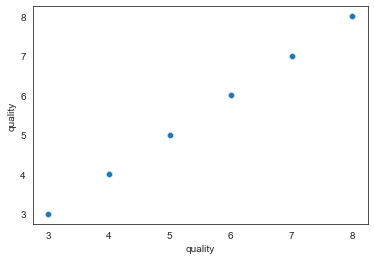

In [88]:
sns.scatterplot(x =df['quality'], y= df['quality']);

In [91]:
def booleamize(x):
	return round(x/10)

df['quality'] = df['quality'].apply(booleamize)

In [92]:
# ======================================================== #
# =================== Seleção de Dados =================== #
# ======================================================== #
dados = {
    'X' : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
    'y' : 'quality',
    'normalizada' : False
}
# ======================================================== #


df = df[ dados['X']+[dados['y']] ]
df = df.dropna()

if not dados['normalizada']:
    for col in dados['X']:
        df[[col]] = df[[col]]/df[[col]].mean()

X = df[ dados['X'] ].to_numpy()
y = df[[ dados['y'] ]].to_numpy()
y = np.hstack((y)).T

df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1585,0.865422,0.738888,1.623762,1.024104,0.754574,1.385834,1.032974,0.998187,0.996644,1.276307,1.103331,1
999,0.769264,1.307263,0.000000,0.649912,0.628812,0.440947,0.258243,0.994857,1.047986,0.805289,1.237650,1
1470,1.201975,1.307263,0.405941,0.551440,0.960367,0.503939,0.516487,0.999030,0.869798,0.714124,0.930636,0
369,1.129857,0.511538,1.955896,0.945326,0.846038,0.377955,0.387365,0.999452,0.966442,1.716937,1.151302,1
753,0.997640,1.231479,0.369037,1.142269,1.017532,1.070871,0.860811,1.001288,0.993624,0.835677,0.911447,0


## Aplicando a regressão logística
*Aplica a função e avalia a precisão da previsão.*

In [101]:
regressor = LogisticRegression(learning_rate=1, n_iters=4000)
regressor.fit(X, y)
predictions = regressor.predict(X)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print(f"A precisão do modelo é: {accuracy(y, predictions)}")

A precisão do modelo é: 0.7317073170731707


# Plotando os resultados visualmente
*~ se você estiver analisando exatamente 2 vars numéricas ~*

In [94]:
try:
    regressor.plot(X, y, dados['X'])
except:
    print("Sem visualização disponível.")

Sem visualização disponível.


## Mostrando os pesos
*Cria uma tabela mostrando os pesos de avaliação das variáveis numéricas.*

In [95]:
norma_pesos = pd.DataFrame(regressor.weights)/pd.DataFrame(regressor.weights).abs().sum()
norma_pesos = norma_pesos[0].values.tolist()

dfpesos = pd.DataFrame({'Pesos':norma_pesos}, index=dados['X'])

dfpesos

,Pesos
fixed acidity,-0.034225
volatile acidity,-0.195480
citric acid,0.003819
residual sugar,0.017365
chlorides,-0.074093
free sulfur dioxide,0.049213
total sulfur dioxide,-0.119390
density,-0.032066
pH,-0.020397
sulphates,0.199840
